### Subject : BigDtata
### Task :  Data visualization on Diabetes data

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sn

In [2]:
import pandas as pd
df = pd.read_csv('Datasets/PimaIndiansdiabetes.csv')

In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
357,13,129,0,30,0,39.9,0.569,44,1
143,10,108,66,0,0,32.4,0.272,42,1
654,1,106,70,28,135,34.2,0.142,22,0
230,4,142,86,0,0,44.0,0.645,22,1
630,7,114,64,0,0,27.4,0.732,34,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Correlation plot ')

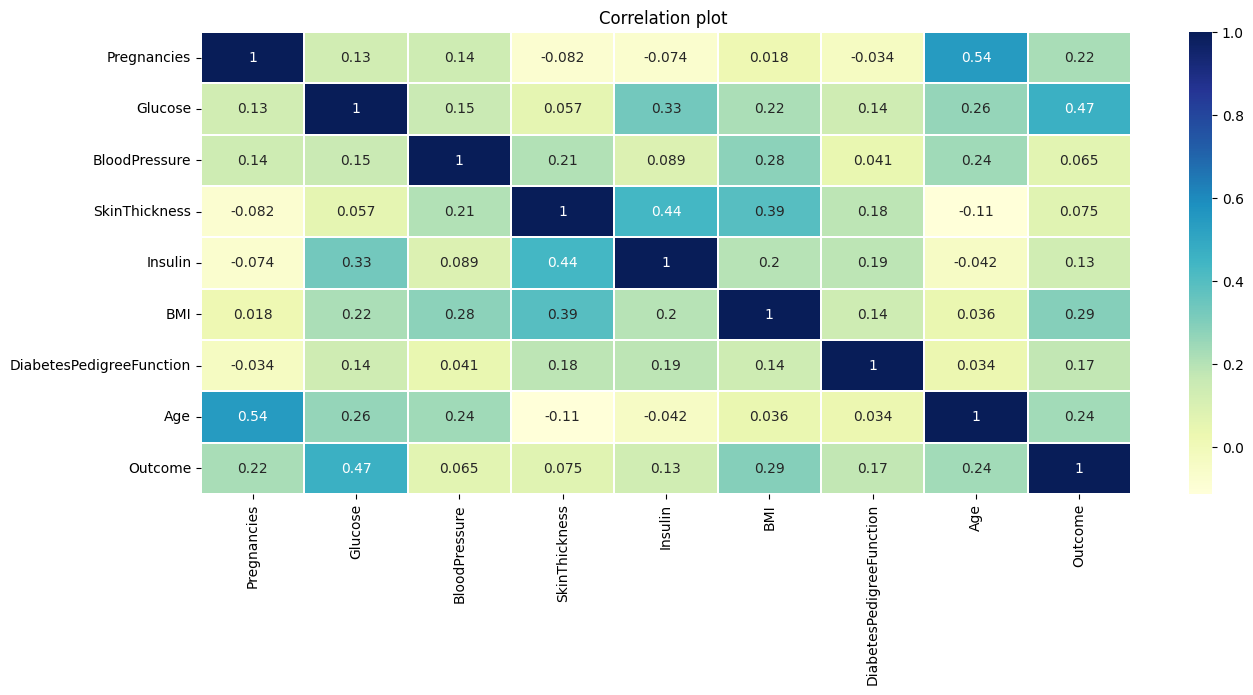

In [6]:
# Visulization of correlations
%matplotlib inline
plt.figure(figsize=(15,6))
sn.heatmap(df.corr(),annot=True,fmt='0.2g',cmap="YlGnBu",linewidths=.3)
plt.title("Correlation plot ")

### We can say that _Glucose_ has highest effect on _Outcome_ with correlation factor of 0.47 
### And _BloodPressure_ has lowest effect on _Outcome_ with correlation factor of 0.065 .

In [7]:
df.shape

(768, 9)

In [8]:
#Lets checkh unique values in each columns
for i in df.columns:
    print(f"Number of unique values in  column '{i}' is : ",(len(df[i].unique())))

Number of unique values in  column 'Pregnancies' is :  17
Number of unique values in  column 'Glucose' is :  136
Number of unique values in  column 'BloodPressure' is :  47
Number of unique values in  column 'SkinThickness' is :  51
Number of unique values in  column 'Insulin' is :  186
Number of unique values in  column 'BMI' is :  248
Number of unique values in  column 'DiabetesPedigreeFunction' is :  517
Number of unique values in  column 'Age' is :  52
Number of unique values in  column 'Outcome' is :  2


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

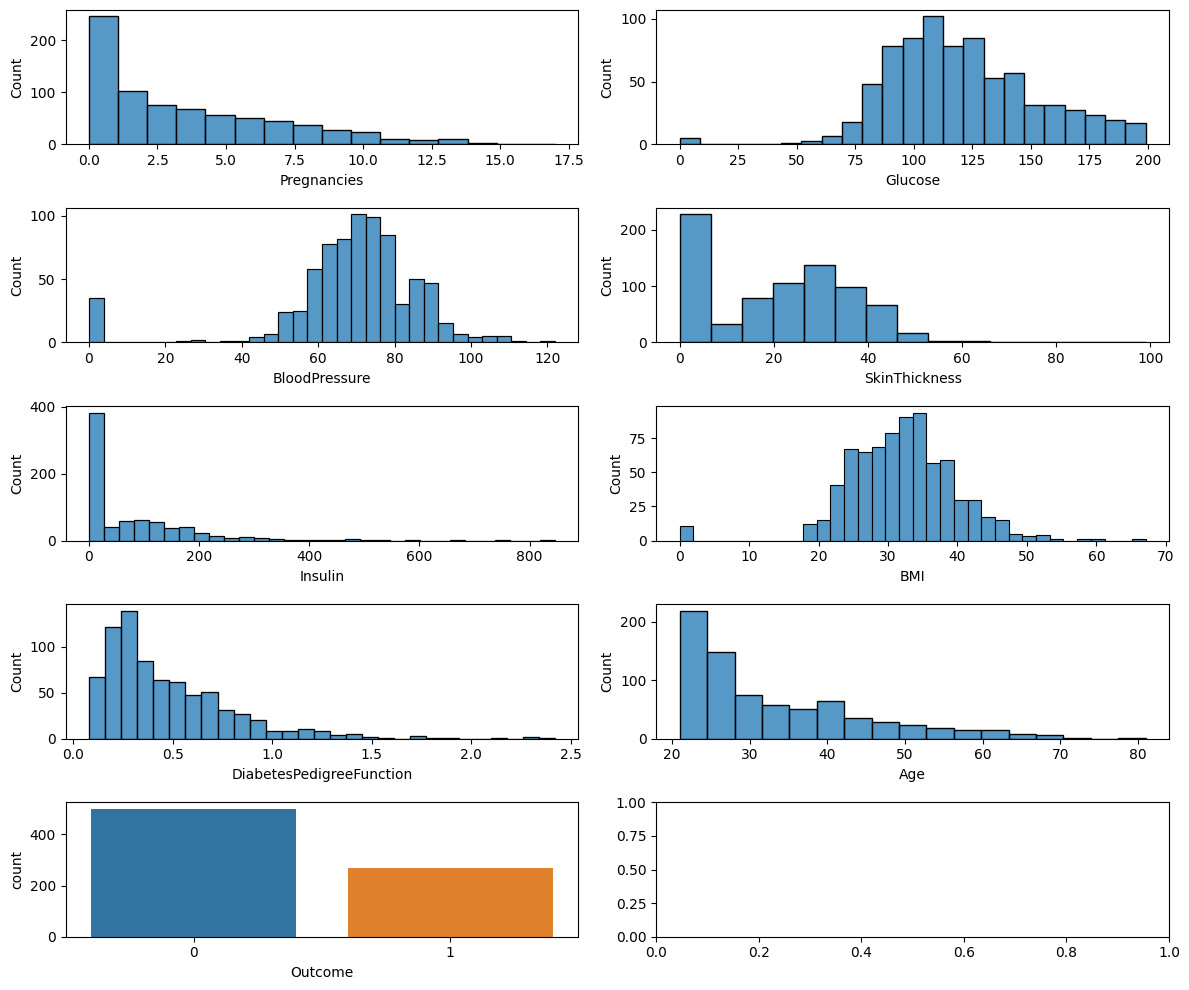

In [10]:
def distribution_Plot(df):
    fig, axes = plt.subplots(5, 2, figsize=(12, 10))

    sn.histplot(data=df, x="Pregnancies",ax=axes[0,0])

    sn.histplot(data=df, x="Glucose",ax=axes[0,1])

    sn.histplot(data=df, x="BloodPressure",ax=axes[1,0])

    sn.histplot(data=df, x="SkinThickness",ax=axes[1,1])

    sn.histplot(data=df, x="Insulin",ax=axes[2,0])

    sn.histplot(data=df, x="BMI",ax=axes[2,1])

    sn.histplot(data=df, x="DiabetesPedigreeFunction",ax=axes[3,0])

    sn.histplot(data=df, x="Age",ax=axes[3,1])

    sn.countplot(data=df, x="Outcome",ax=axes[4,0])

    plt.tight_layout();
# Calling
distribution_Plot(df)

* __There are zero values present in _'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',and 'BMI'_ , But in reality it  is not possible for a alive human.So we have to handle these zero values .__


In [8]:
def countZeros(df):
    zeros={}
    for col in df.columns:
        if col not in ['Pregnancies' ,'Outcome']:
            l = len(list(filter(lambda x : x==0,df[col])))
            zeros[col] = l
    return zeros
countZeros(df1)

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

### Lets replace 0 with mean

In [9]:
def replace_Zero(lst_of_cols):
    for col in lst_of_cols:
        df[col] = df[col].replace(0 , round(df[col].mean(),2))
        
replace_Zero(list(df.columns)[1:8])

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,79.8,33.6,0.627,50,1
1,1,85.0,66.0,29.00,79.8,26.6,0.351,31,0
2,8,183.0,64.0,20.54,79.8,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00,79.8,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.54,79.8,30.1,0.349,47,1


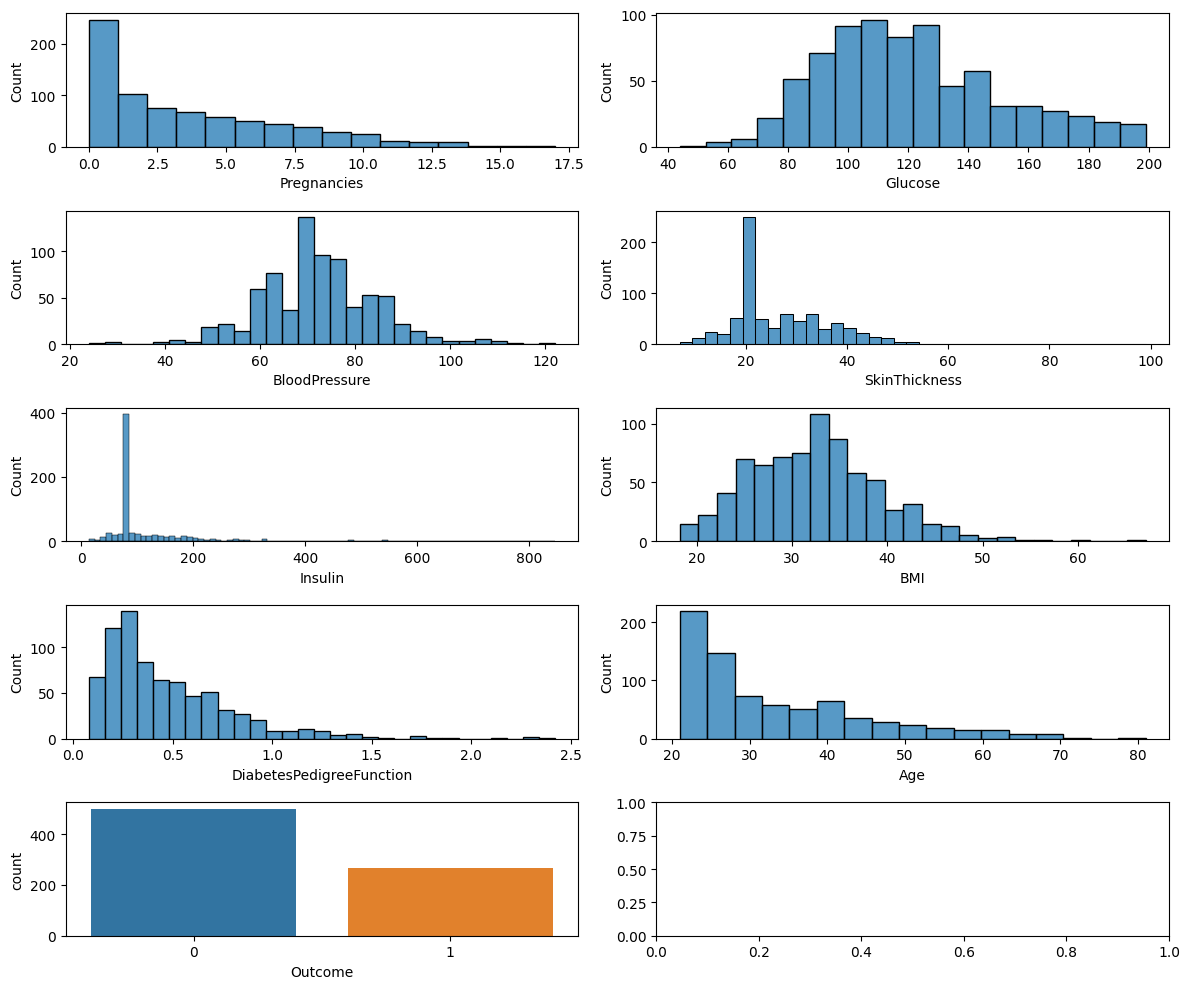

In [12]:
# Distribution after replacing zeros
distribution_Plot(df)

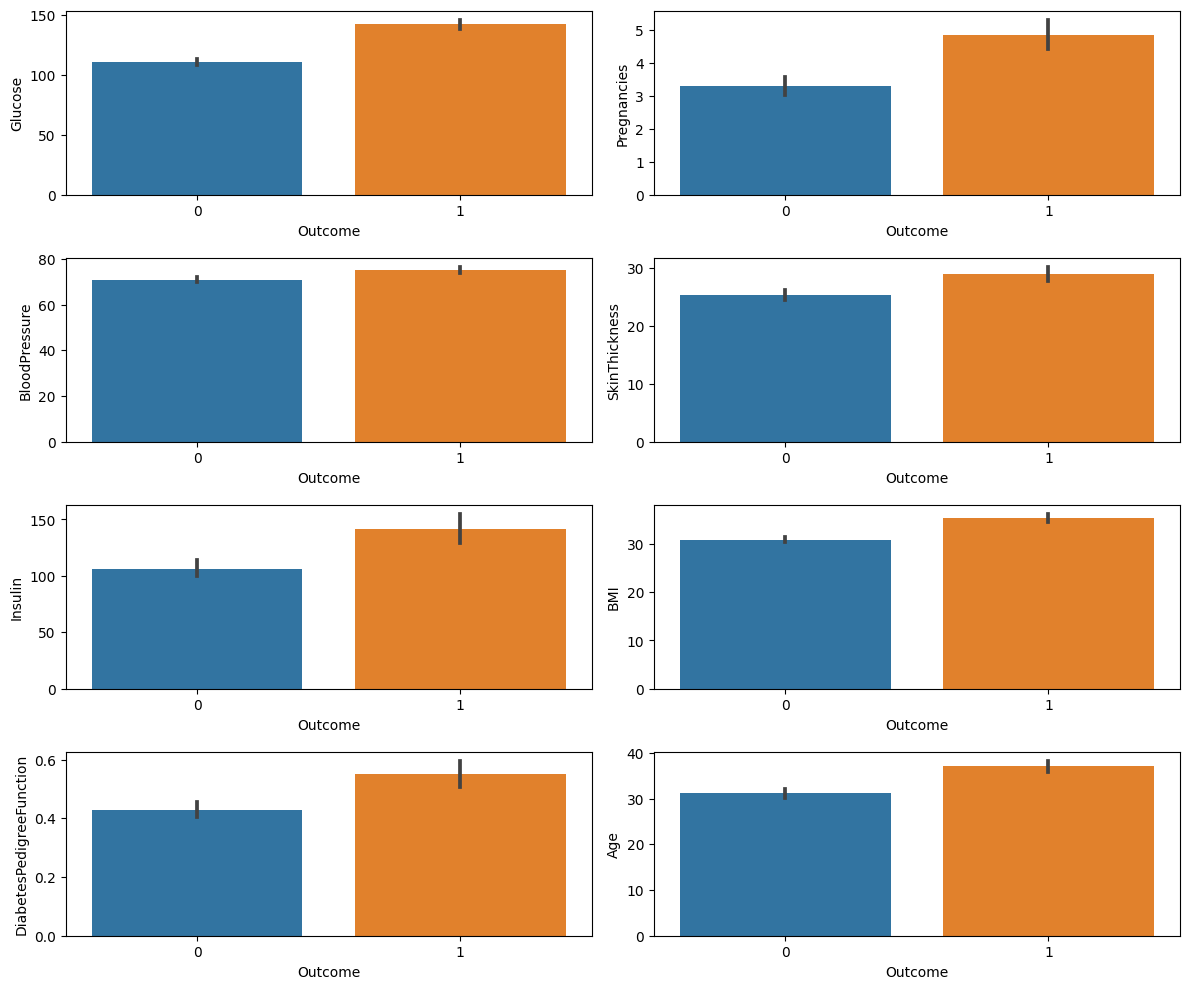

In [13]:
# Plotting each continuous feature with Outcome
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

sn.barplot(y='Glucose',x='Outcome',data=df,ax=axes[0,0])
sn.barplot(y='Pregnancies',x='Outcome',data=df,ax=axes[0,1])
sn.barplot(y='BloodPressure',x='Outcome',data=df,ax=axes[1,0])
sn.barplot(y='SkinThickness',x='Outcome',data=df,ax=axes[1,1])
sn.barplot(y='Insulin',x='Outcome',data=df,ax=axes[2,0])
sn.barplot(y='BMI',x='Outcome',data=df,ax=axes[2,1])
sn.barplot(y='DiabetesPedigreeFunction',x='Outcome',data=df,ax=axes[3,0])
sn.barplot(y='Age',x='Outcome',data=df,ax=axes[3,1])

plt.tight_layout();

### Statistical Analysis 
* Mean/Median/Mod
* Standard Devition
* Variance

In [15]:
from simple_colors import *
def statisticalDescription(df):
    l = df.columns[:len(df.columns)-1]
    for i in l:
        if df.dtypes[i]!='O':
            print('- '*40)
            print(green(f"\tMean of {i}                 :  {df[i].mean()}",['bold']))
            print(blue(f"\tVariance of {i}             :  {df[i].var()}",['bold']))
            print(blue(f"\tStandard Deviation of {i}   :  {df[i].std()}",['bold']))
            print(magenta(f"\tFirst Quantile (Q1)of {i}   :  {df[i].quantile(0.25)}",['bold']))
            print(magenta(f"\tSecond Quantile (Q2)of {i}  :  {df[i].quantile(0.50)}",['bold']))
            print(magenta(f"\tThird Quantile (Q3)of {i}   :  {df[i].quantile(0.75)}",['bold']))
    print('- '*40)
            
statisticalDescription(df)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	Mean of Pregnancies                 :  3.8450520833333335
	Variance of Pregnancies             :  11.354056320621465
	Standard Deviation of Pregnancies   :  3.3695780626988694
	First Quantile (Q1)of Pregnancies   :  1.0
	Second Quantile (Q2)of Pregnancies  :  3.0
	Third Quantile (Q3)of Pregnancies   :  6.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	Mean of Glucose                 :  121.68157552083333
	Variance of Glucose             :  926.3510949069358
	Standard Deviation of Glucose   :  30.436016409953123
	First Quantile (Q1)of Glucose   :  99.75
	Second Quantile (Q2)of Glucose  :  117.0
	Third Quantile (Q3)of Glucose   :  140.25
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
	Mean of BloodPressure                 :  72.25501302083335
	Variance of BloodPressure             :  146.794497001134
	Standard Deviation of BloodPressure  

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208983,0.013403,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219665,0.160783,0.396598,0.231480,0.137107,0.266600,0.492908
BloodPressure,0.208983,0.219665,1.000000,0.134172,0.010920,0.281231,0.000367,0.326738,0.162991
SkinThickness,0.013403,0.160783,0.134172,1.000000,0.240331,0.535726,0.154946,0.026462,0.175047
Insulin,-0.018082,0.396598,0.010920,0.240331,1.000000,0.189858,0.157806,0.038653,0.179186
BMI,0.021546,0.231480,0.281231,0.535726,0.189858,1.000000,0.153509,0.025749,0.312256
DiabetesPedigreeFunction,-0.033523,0.137107,0.000367,0.154946,0.157806,0.153509,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326738,0.026462,0.038653,0.025749,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162991,0.175047,0.179186,0.312256,0.173844,0.238356,1.000000


In [17]:
#ProfileReport(df)

In [5]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00,79.8,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.54,79.8,30.1,0.349,47,1
767,1,93.0,70.0,31.00,79.8,30.4,0.315,23,0


# Outliers Visulization

<AxesSubplot:>

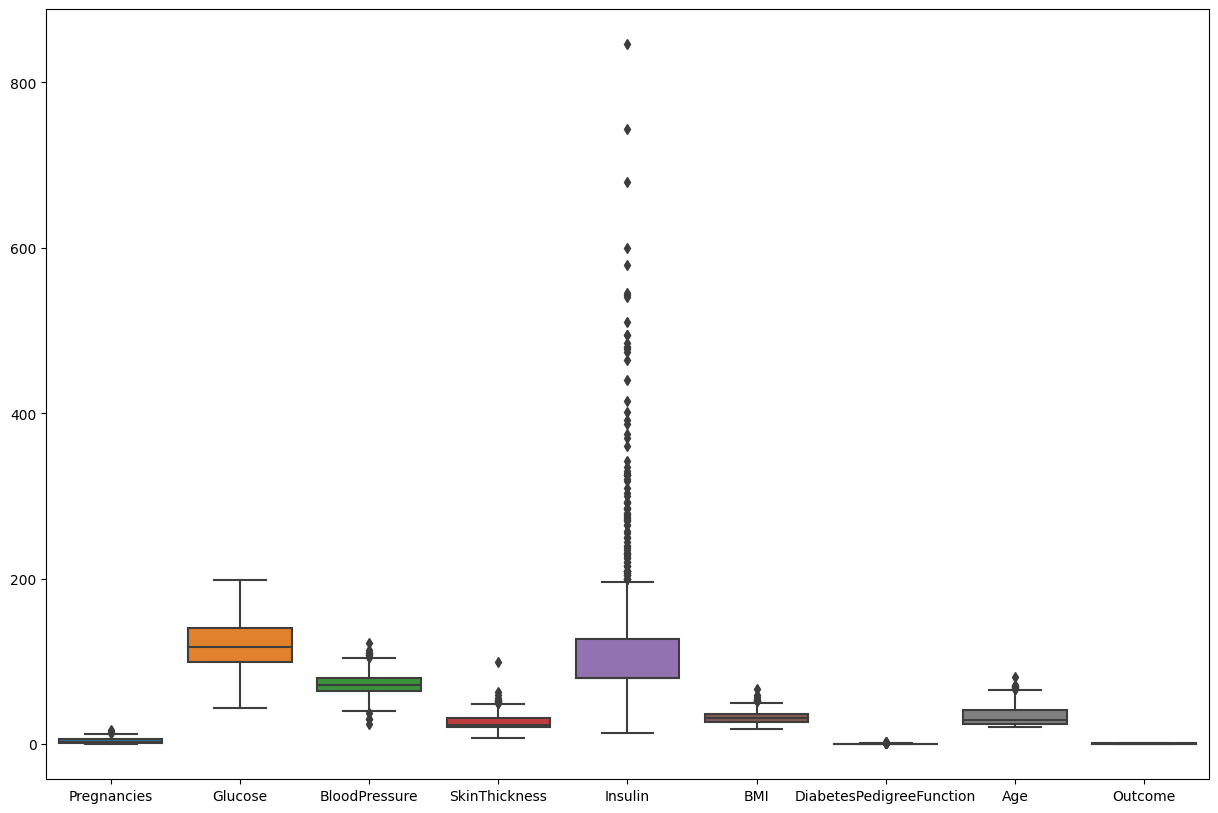

In [19]:
plt.figure(figsize=(15,10))
sn.boxplot(data = df)

* __Above graphas are denoting that there are _outliers_ present in our dataset__
* __And data is not distributed at similar scale.__

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
d = df.drop(columns=['Outcome'])
df_scaled = scalar.fit_transform(d)

<AxesSubplot:>

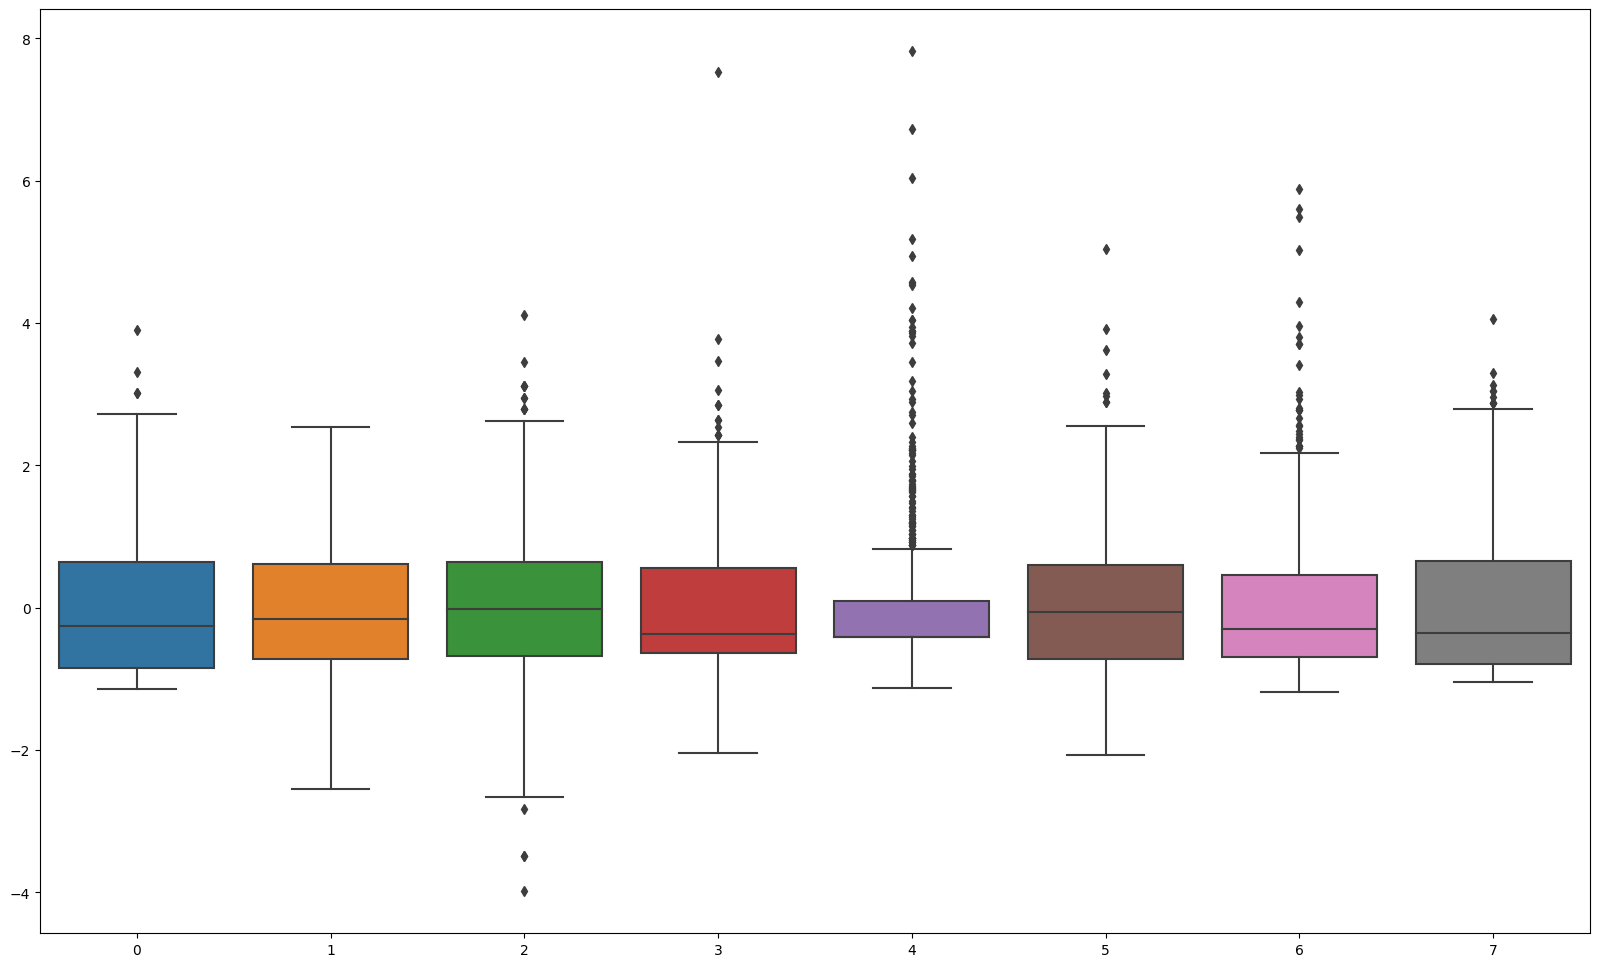

In [21]:
#df_scalar = pd.DataFrame(scalar.fit_transform(df))
fig ,ax  = plt.subplots(figsize = (20,12))
sn.boxplot(data = df_scaled , ax = ax)

### Now our all features are lying at same level